In [1]:
import os
import tarfile
from six.moves import urllib
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("datasets/housing/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

In [6]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
label.fit(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'])
df['ocean_proximity'] = label.transform(df['ocean_proximity'])

In [9]:
df_2 = df

In [8]:
### One hot encode
# df_test = pd.concat([df_test,pd.get_dummies(df_test['ocean_proximity'], prefix='ocean_proximity')],axis=1)
# df_test = df_test.drop(['ocean_proximity'], axis = 1)
# df_test.info()

In [12]:
median = df_2["total_bedrooms"].median()
df_2["total_bedrooms"].fillna(median, inplace = True)

In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [13]:
df.shape

(20640, 10)

In [14]:
import matplotlib.pyplot as plt

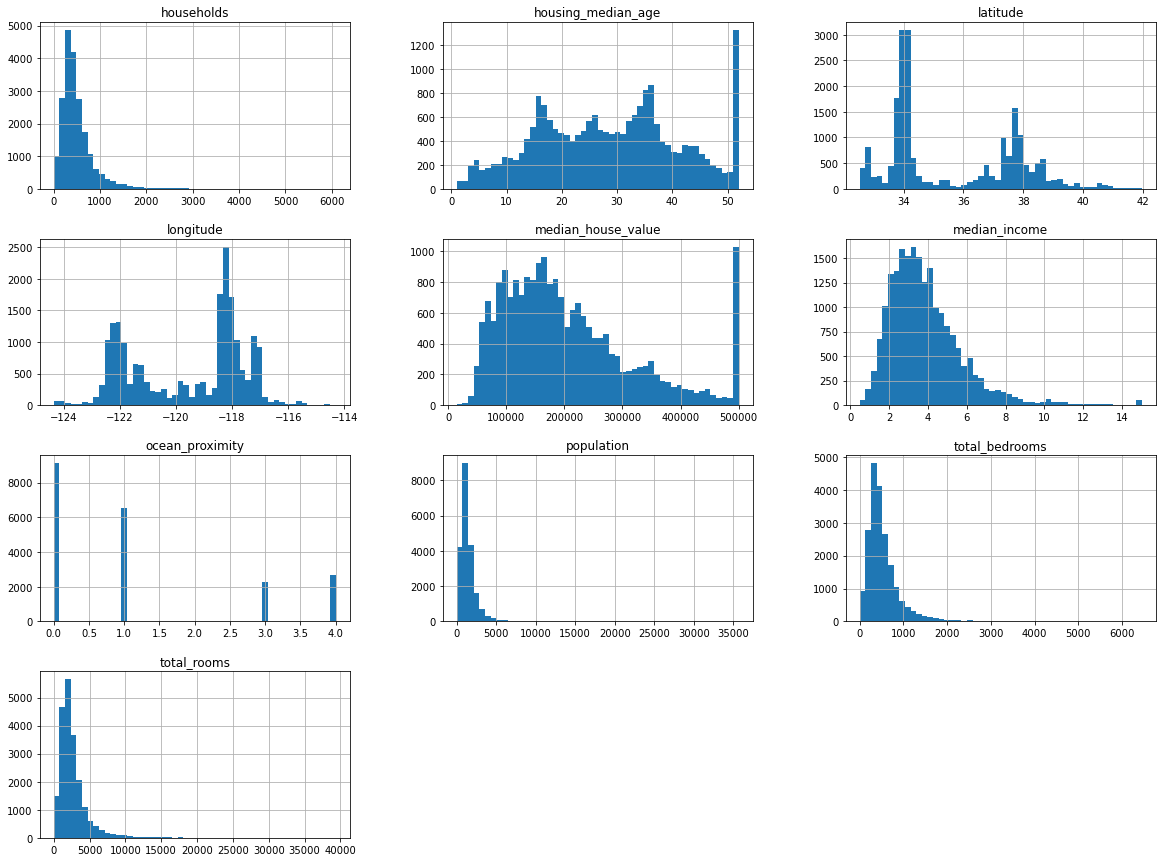

In [15]:
df.hist(bins = 50, figsize= (20,15))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
house = df_2["households"]

In [16]:
houssing_median_age = df_2["housing_median_age"]

In [17]:
latitude = df_2["latitude"]

In [18]:
longitude = df_2["longitude"]

In [19]:
median_house_value = df_2["median_house_value"]

In [22]:
median_income = df_2["median_income"]

In [21]:
population = df_2["population"]

In [23]:
total_bedrooms = df_2["total_bedrooms"]

In [24]:
total_rooms = df_2["total_rooms"]

In [25]:
ocean_proximity = df_2["ocean_proximity"]

In [130]:
df_2["household_log"] = (house - house.min() + 1).transform(np.log)
df_2.head()

C:\Users\You\anaconda3\envs\ds101\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,household_log
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,500001.0,INLAND,4.174387
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,270000.0,NEAR BAY,6.102559
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,196100.0,<1H OCEAN,5.908083
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,118800.0,<1H OCEAN,5.327876
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,225000.0,<1H OCEAN,6.356108


In [131]:
df_2["houssing_median_age_log"] = (houssing_median_age - houssing_median_age.min() + 1).transform(np.log)

C:\Users\You\anaconda3\envs\ds101\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
median = df_2["total_bedrooms"].median()
df_2["total_bedrooms"].fillna(median, inplace = True)

C:\Users\You\anaconda3\envs\ds101\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [134]:
df_2.isnull().sum()

longitude                  0
latitude                   0
housing_median_age         0
total_rooms                0
total_bedrooms             0
population                 0
households                 0
median_income              0
median_house_value         0
ocean_proximity            0
household_log              0
houssing_median_age_log    0
dtype: int64

In [135]:
df_2["rooms_per_household"] = df_2["total_rooms"] / df_2["households"]
df_2["bedrooms_per_rooms"] = df_2["total_bedrooms"] / df_2["total_rooms"]
df_2["population_per_household"] = df_2["population"] / df_2["households"]

C:\Users\You\anaconda3\envs\ds101\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\You\anaconda3\envs\ds101\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\You\anaconda3\envs\ds101\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [136]:
df_2.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
household_log               0
houssing_median_age_log     0
rooms_per_household         0
bedrooms_per_rooms          0
population_per_household    0
dtype: int64

In [137]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  household_log             16512 non-null  float64
 11  houssing_median_age_log   16512 non-null  float64
 12  rooms_per_household       16512 non-null  float64
 13  bedrooms_per_rooms        16512 non-null  float64
 14  pop

In [138]:
rooms_per_household = df_2['rooms_per_household']
population_per_household = df_2['population_per_household']
bedrooms_per_rooms = df_2['bedrooms_per_rooms']

In [139]:
df_2["latitude_log"] = (latitude - latitude.min() + 1).transform(np.log)
df_2["longitude_log"] = (longitude - longitude.min() + 1).transform(np.log)
df_2["total_rooms_log"] = (total_rooms - total_rooms.min() + 1).transform(np.log)
df_2["total_bedrooms_log"] = (total_bedrooms - total_bedrooms.min() + 1).transform(np.log)
df_2["population_log"] = (population - population.min() + 1).transform(np.log)
df_2["median_income_log"] = (median_income - median_income.min() + 1).transform(np.log)
df_2["rooms_per_household_log"] = (rooms_per_household - rooms_per_household.min() + 1).transform(np.log)
df_2["population_per_household_log"] = (population_per_household  - population_per_household.min() + 1).transform(np.log)
df_2["bedrooms_per_rooms_log"] = (bedrooms_per_rooms   - bedrooms_per_rooms.min() + 1).transform(np.log)

C:\Users\You\anaconda3\envs\ds101\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\You\anaconda3\envs\ds101\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\You\anaconda3\envs\ds101\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

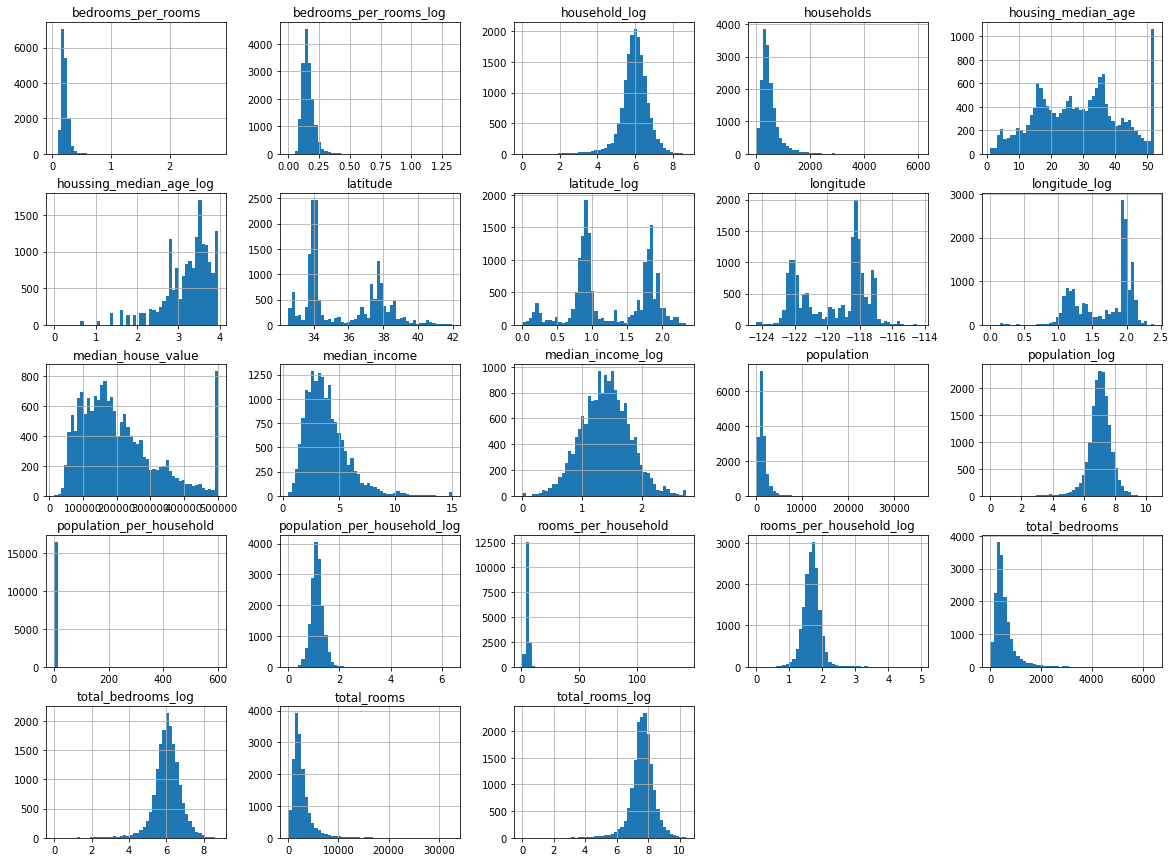

In [140]:
df_2.hist(bins = 50, figsize= (20,15))
plt.show()

In [151]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     16512 non-null  float64
 1   latitude                      16512 non-null  float64
 2   housing_median_age            16512 non-null  float64
 3   total_rooms                   16512 non-null  float64
 4   total_bedrooms                16512 non-null  float64
 5   population                    16512 non-null  float64
 6   households                    16512 non-null  float64
 7   median_income                 16512 non-null  float64
 8   median_house_value            16512 non-null  float64
 9   ocean_proximity               16512 non-null  object 
 10  household_log                 16512 non-null  float64
 11  houssing_median_age_log       16512 non-null  float64
 12  rooms_per_household           16512 non-null  float64
 13

In [215]:
df_2_semi1hot = df_2.drop(['household_log','total_bedrooms_log','total_rooms_log','latitude_log', 'total_rooms', 'total_bedrooms','population','households', 'median_income', 'rooms_per_household', 'bedrooms_per_rooms','houssing_median_age_log','longitude_log','population_per_household'], axis = 1)
df_2_semi1hot = pd.concat([df_2_semi1hot,pd.get_dummies(df_2_semi1hot['ocean_proximity'], prefix='ocean_proximity')],axis=1)
df_2_semi1hot = df_2_semi1hot.drop(['ocean_proximity'], axis = 1)
df_2_semi1hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     16512 non-null  float64
 1   latitude                      16512 non-null  float64
 2   housing_median_age            16512 non-null  float64
 3   median_house_value            16512 non-null  float64
 4   population_log                16512 non-null  float64
 5   median_income_log             16512 non-null  float64
 6   rooms_per_household_log       16512 non-null  float64
 7   population_per_household_log  16512 non-null  float64
 8   bedrooms_per_rooms_log        16512 non-null  float64
 9   ocean_proximity_<1H OCEAN     16512 non-null  uint8  
 10  ocean_proximity_INLAND        16512 non-null  uint8  
 11  ocean_proximity_ISLAND        16512 non-null  uint8  
 12  ocean_proximity_NEAR BAY      16512 non-null  uint8  
 13

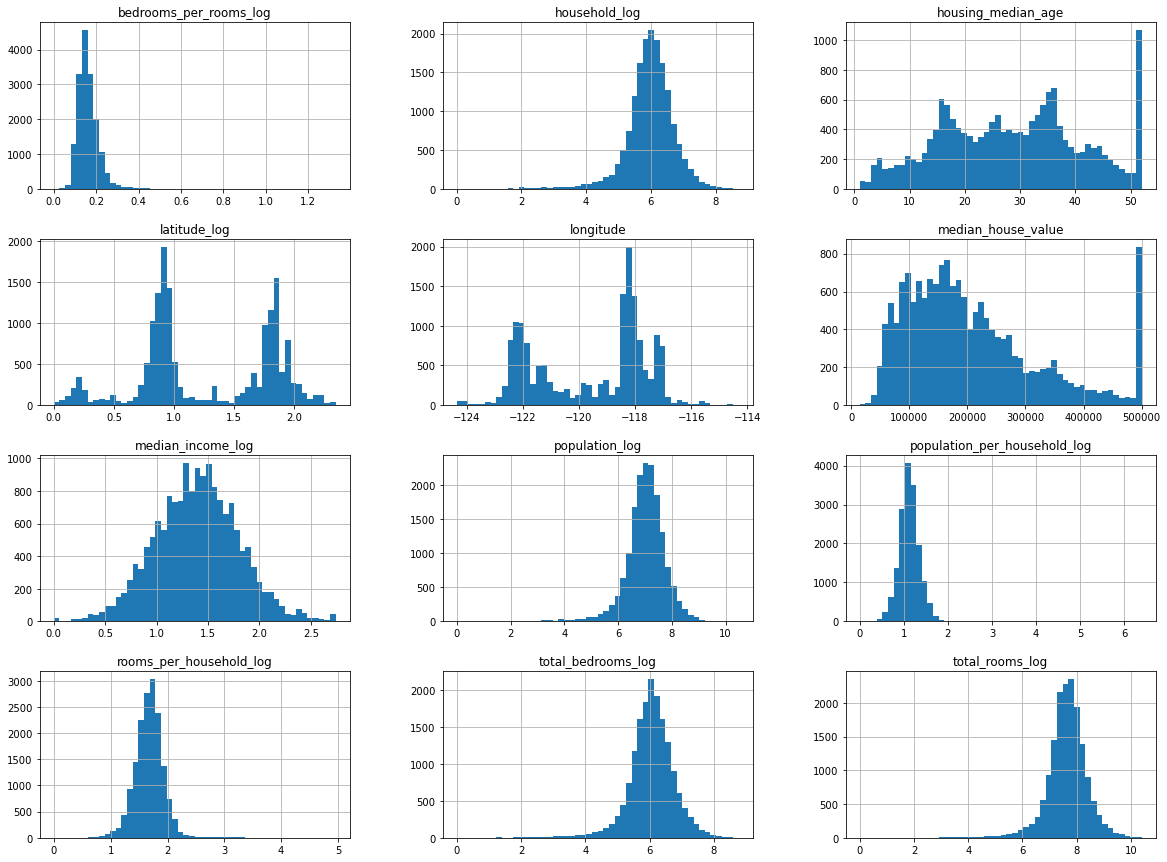

In [165]:
df_2_semi1.hist(bins = 50, figsize= (20,15))
plt.show()

In [74]:
df_2_semi5 = df_2.drop([ 'latitude', 'total_rooms', 'total_bedrooms','population','households', 'median_income', 'rooms_per_household', 'bedrooms_per_rooms','houssing_median_age_log','longitude_log','population_per_household','population_per_household_log'], axis = 1)
df_2_semi5.head()

,longitude,housing_median_age,median_house_value,household_log,ocean_proximity_1hot,latitude_log,total_rooms_log,total_bedrooms_log,population_log,median_income_log,rooms_per_household_log,bedrooms_per_rooms_log
12069,-117.55,6.0,500001.0,4.174387,"(0, 1)\t1.0\n (1, 3)\t1.0\n (2, 0)\t1.0\n ...",0.828552,6.216606,4.330733,5.420535,1.555763,2.063937,0.108252
15925,-122.44,52.0,270000.0,6.102559,"(0, 1)\t1.0\n (1, 3)\t1.0\n (2, 0)\t1.0\n ...",1.822935,7.774856,6.198479,7.301822,1.587172,1.701191,0.156636
11162,-118.00,26.0,196100.0,5.908083,"(0, 1)\t1.0\n (1, 3)\t1.0\n (2, 0)\t1.0\n ...",0.828552,7.448334,5.953243,6.927558,1.489167,1.573256,0.171456
4904,-118.26,38.0,118800.0,5.327876,"(0, 1)\t1.0\n (1, 3)\t1.0\n (2, 0)\t1.0\n ...",0.904218,6.545350,5.337538,6.616065,0.675696,1.263375,0.232188
4683,-118.36,52.0,225000.0,6.356108,"(0, 1)\t1.0\n (1, 3)\t1.0\n (2, 0)\t1.0\n ...",0.932164,7.771489,6.398595,7.032624,1.301988,1.452465,0.195732


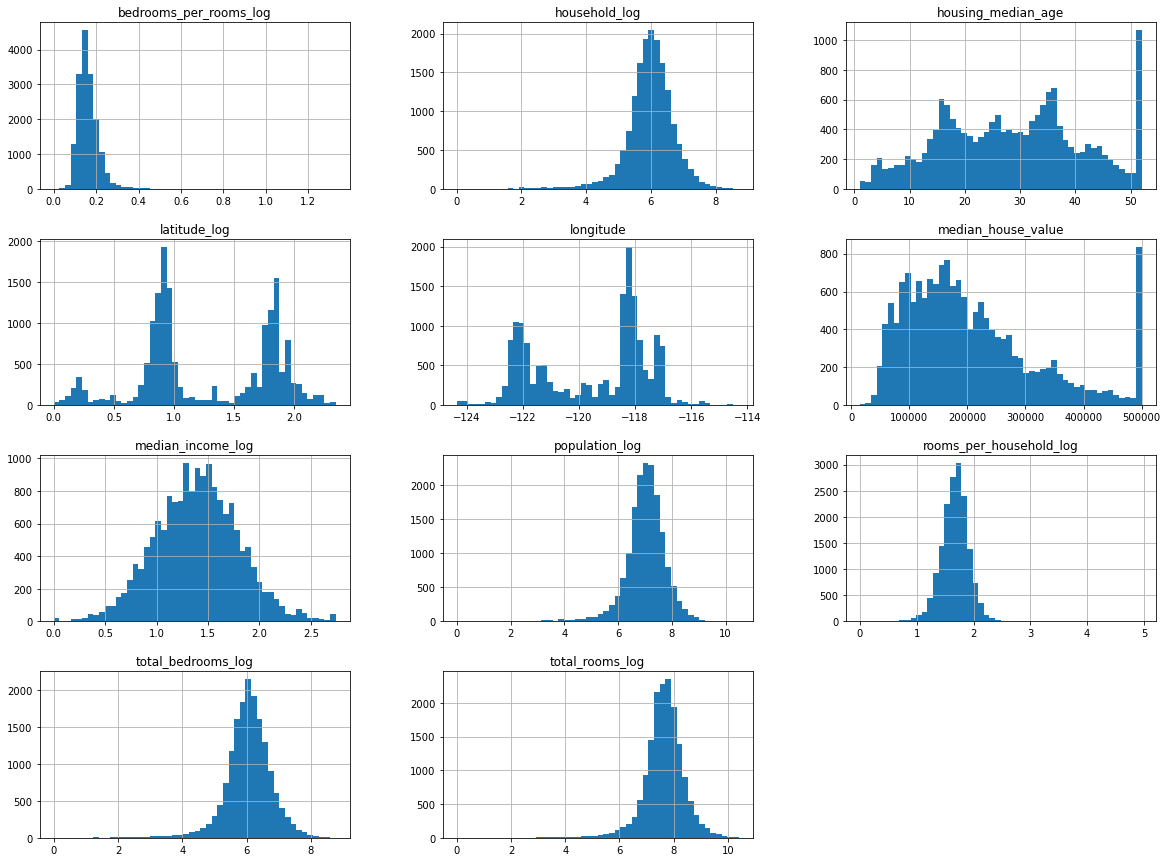

In [75]:
df_2_semi5.hist(bins = 50, figsize= (20,15))
plt.show()

In [189]:
df_2_semi6 = df_2.drop([ 'latitude', 'total_rooms', 'total_bedrooms','population','households', 'median_income', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_rooms','houssing_median_age_log','longitude_log','population_per_household','population_per_household_log','bedrooms_per_rooms_log','longitude'], axis = 1)
df_2_semi6.head()

,housing_median_age,median_house_value,household_log,latitude_log,total_rooms_log,total_bedrooms_log,population_log,median_income_log,rooms_per_household_log
12069,6.0,500001.0,4.174387,0.828552,6.216606,4.330733,5.420535,1.555763,2.063937
15925,52.0,270000.0,6.102559,1.822935,7.774856,6.198479,7.301822,1.587172,1.701191
11162,26.0,196100.0,5.908083,0.828552,7.448334,5.953243,6.927558,1.489167,1.573256
4904,38.0,118800.0,5.327876,0.904218,6.545350,5.337538,6.616065,0.675696,1.263375
4683,52.0,225000.0,6.356108,0.932164,7.771489,6.398595,7.032624,1.301988,1.452465


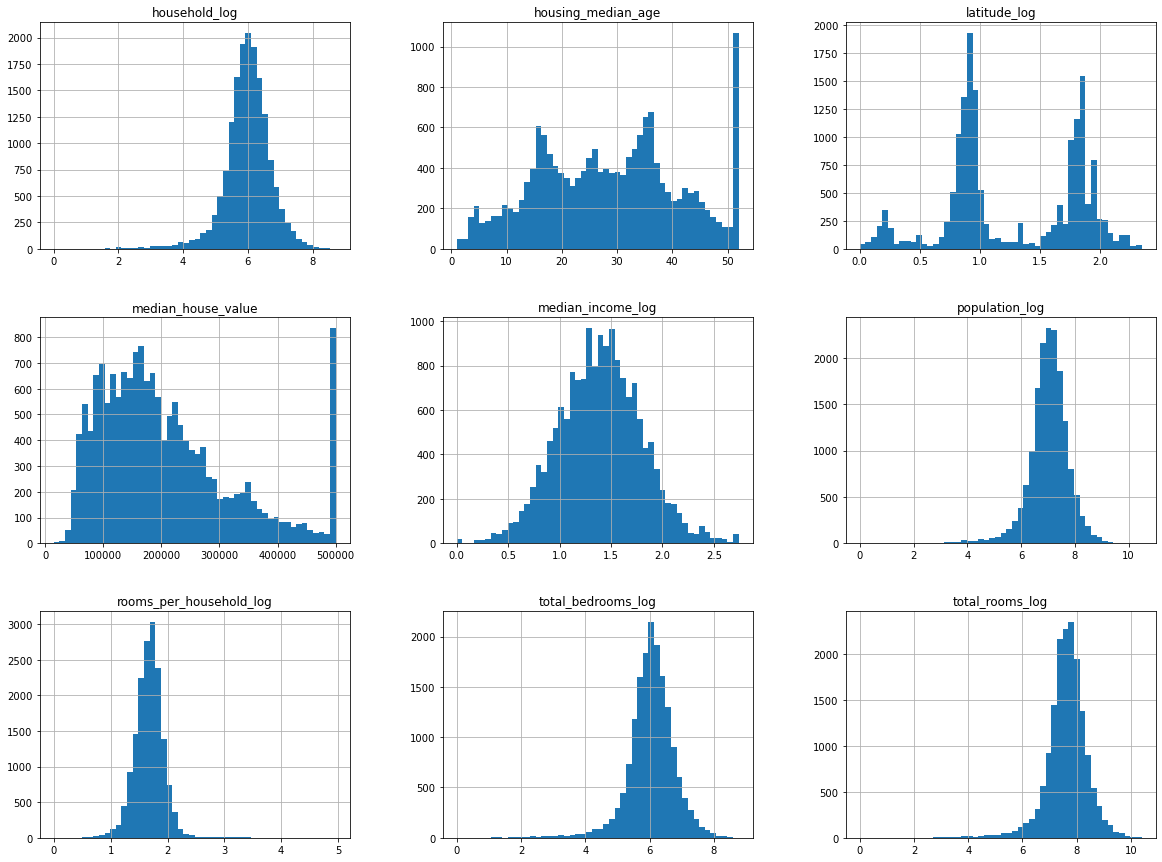

In [190]:
df_2_semi6.hist(bins = 50, figsize= (20,15))
plt.show()

In [159]:
df_2_semi1.isnull().sum()

longitude                       0
housing_median_age              0
median_house_value              0
household_log                   0
latitude_log                    0
total_rooms_log                 0
total_bedrooms_log              0
median_income_log               0
rooms_per_household_log         0
population_per_household_log    0
bedrooms_per_rooms_log          0
dtype: int64

In [ ]:
# median = df["total_bedrooms_log"].median()
# df["total_bedrooms_log"].fillna(median, inplace = True)

In [130]:
# df_semi["rooms_per_household_log"] = df_semi["total_rooms_log"] / df_semi["household_log"]
# df_semi["bedrooms_per_rooms_log"] = df_semi["total_bedrooms_log"] / df_semi["total_rooms_log"]
# df_semi["population_per_household"] = df_semi["population_log"] / df_semi["household_log"]

In [34]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_2, test_size = 0.2, random_state = 0)

In [42]:
import numpy as np

In [49]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity,median_income_log
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,500001.0,1,1.555763
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,270000.0,3,1.587172
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,196100.0,0,1.489167
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,118800.0,0,0.675696
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,225000.0,0,1.301988
...,...,...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,144600.0,1,1.591803
19648,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,159400.0,1,1.227767
9845,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,289300.0,4,1.307738
10799,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,484600.0,0,1.813456


In [43]:
x_train = np.asanyarray(train.drop(['median_house_value'], axis = 1))
y_train = np.asanyarray(train["median_house_value"])

x_test = np.asanyarray(test.drop(['median_house_value'],axis=1))
y_test = np.asanyarray(test['median_house_value'])

In [50]:
# xtrain = np.asanyarray(train['median_income_log'])
# ytrain = np.asanyarray(train['median_house_value'])

# xtest = np.asanyarray(test['median_income_log'])
# ytest = np.asanyarray(test['median_house_value'])

In [217]:
x_test.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [41]:
x_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
ocean_proximity       0
median_income_log     0
dtype: int64

In [51]:
regr = LinearRegression()
regr.fit(xtrain, ytrain)

ValueError: Expected 2D array, got 1D array instead:
array=[1.55576284 1.58717185 1.48916678 ... 1.30773805 1.81345573 0.63567695].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [45]:
yhat = regr.predict(x_test)

In [46]:
evaluation = mean_squared_error(yhat, y_test)
evaluation_sq = np.sqrt(evaluation)
evaluation_sq

73747.79525177157

In [33]:
df_2["median_income_log"] = (median_income - median_income.min() + 1).transform(np.log)
df_2 = df_2.drop(["median_income"], axis = 1)

In [ ]:
df_2 = df_2["median_income_log", ]